Kelden Ben-Ora

915987250

EAE 127 Fall 2021

# Project 6: Airfoil Performance and Wing Design

In this project, we take all of the previous knowledge we have accumulated about airfoils to analyze the performance of different airfoils in a specific application. 

In this case, the first task is to identify the best airfoil for our Reno Air Race aircraft. We are going to analyze 4 different airfoils and choose one for our aircraft. First, the problem is set up by identifying important paramaters such as the Reynold's number, the lift coefficient required for level 1G flight, and the lift coefficient required for turning 2G flight. Then the 4 airfoils are analyzed in Pyxfoil to calculate the lift curves, drag polars, and lift to drag ratio versus alpha sets of data. Each airfoil will have different stall characteristics and required angles of attack to maintain the desired flight conditions. The results of these are tabulatead.

Now that we have sufficiently analyzed 2D airfoils and approximated 3D wing performances using the airfoil data, we can begin to visualize some 3D wings. A simple function has been written to visualize NACA 5-digit airfoil wings. It does not include the options for swept wings, taper, washout, and others but these functions can be added to improve the visualizations.

Finally, the performance of an example aircraft is analyzed with 3D drag effects applied. The parameters of interest are calculated to identify an estimate of the aircraft's performance.

## Problem 1: Airfoil Selection Process

In the first problem, 4 airfoils are analyzed for our racing aircraft. The airfoils are the Wortmann FX S 02-196, P51-D wing root, NASA-Langley NLF414f, and the NACA 24012.

In [173]:
# 1.1a
# Design conditions
s = 235 # ft2 wing area
c = 9 # ft chord length
b = 42.5 # ft span
Vcruise = 400 # mph
Vcruise = Vcruise*5280/3600 # ft/s
h = 21000 # ft geometric cruise altitude
w = 15000 # lbs loaded weight
mu = 3.25e-7 # slugs/fts dynamic viscosity at h
rho = 1.2249e-3 # slugs/ft3 air density at h

Re = rho * Vcruise * c / mu
Cl_cruise = 2*w/(c*rho*Vcruise**2)/32.2 # using the assumption that Cl is approx = to CL as given in problem statement
print(f"Design Reynold's number: {Re:.2e}")
print(f"CL_cruise: {Cl_cruise:.3f}")
print(f"CL_2g: {Cl_cruise*2:.3f}")

Design Reynold's number: 1.99e+07
CL_cruise: 0.246
CL_2g: 0.491


In [174]:
# Creating 24012 geometry with code from project 1
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

airfoil_name = '24012'
chord = 1

def airfoil_surface(airfoil, c):
    
    tau = ''.join(list(airfoil)[2:4]) # grab just the third and fourth digits from the NACA code
    t = int(tau)/100/c

    x = np.linspace(start=0, stop=1, num=101)
    x *= c # just in case chord is not 1
    # Given formula for symmetric airfoil surface points
    zt_c_upper = t/0.2*(0.2969*(x/c)**0.5 - 0.126*(x/c) - 0.3516*(x/c)**2 + 0.2843*(x/c)**3 - 0.1015*(x/c)**4) 
    zt_c_lower = -zt_c_upper # The lower surface is just the reflection of the upper surface
    camber = 0*x
    
    # output in following format: [[x], [top surface], [bottom surface], [camber]]
    return [x, zt_c_upper, zt_c_lower, camber]

def cambered_airfoil_5(foil, c):
    L = int(list(foil)[0])
    P = int(list(foil)[1])
    TT = int(''.join(list(foil)[3:5]))
    r = [0.058, 0.126, 0.2025, 0.29, 0.391]
    k1 = [361.400, 51.640, 15.957, 6.643, 3.230]
    x = np.linspace(start=0, stop=1, num=101)
    camber = np.zeros(len(x)) # set up the camber variable
    for i in range(len(camber)): # looping through to define each camber point based on given formula
        if x[i] < r[P-1]: # piecewise criteria
            camber[i] =  k1[P-1]/6*((x[i]**3) - (3*r[P-1]*x[i]**2)+(r[P-1])**2*(3-r[P-1])*x[i])# given formula for first piecewise section
        else:
            camber[i] =  k1[P-1]*r[P-1]**3/6*(1-x[i])# fiven formula for second piecewise section
    camber *= L/2
    # inputting thickness information into function created for problem 1.1 to get airfoil's outer geometry
    airfoil_geometry = airfoil_surface(f'00{TT}', c)
    zt_c_upper = np.add(camber, airfoil_geometry[1]) # using camber line to get airfoil surface because it's not symmetric
    zt_c_lower = np.add(camber, airfoil_geometry[2])
    return x, zt_c_upper, zt_c_lower

x, zt_c_upper, zt_c_lower = cambered_airfoil_5(airfoil_name, chord)
x = np.concatenate((np.flip(x), x[1:-1]))
z = np.concatenate((np.flip(zt_c_upper), zt_c_lower[1:-1]))
df = pd.DataFrame({'x': x, 'z': z})
df.to_csv('data/naca24012.dat', sep='\t', index=False)
        

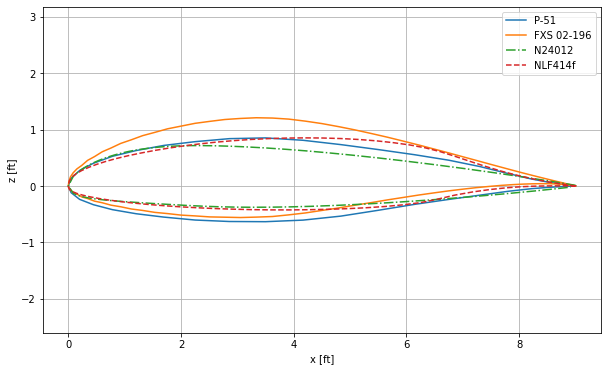

In [175]:
import os
import numpy

p51_root_path = os.path.join('data', f'p51droot-il.csv')
with open(p51_root_path, 'r') as infile:
    x_p51, y_p51 = numpy.loadtxt(infile, dtype=float, unpack=True, delimiter=',', skiprows=9, max_rows=41)
x_p51 *= 0.00328084 # convert mm to feet
y_p51 *= 0.00328084

fxs02196_path = os.path.join('data', f'fxs02196.dat')
with open(fxs02196_path, 'r') as infile:
    x_glider, y_glider = numpy.loadtxt(infile, unpack=True, skiprows=1)
x_glider *= 9 
y_glider *= 9

naca_path = os.path.join('data', f'naca24012.dat')
with open(naca_path, 'r') as infile:
    x_naca, y_naca = numpy.loadtxt(infile, dtype=float, unpack=True, skiprows=1)
x_naca *= 9
y_naca *= 9

nlf_path = os.path.join('data', f'NLF414f.dat')
with open(nlf_path, 'r') as infile:
    x_nlf, y_nlf = numpy.loadtxt(infile, dtype=float, unpack=True)
x_nlf *= 9
y_nlf *= 9

plt.figure(figsize=(10,6))
plt.plot(x_p51, y_p51, label='P-51')
plt.plot(x_glider, y_glider, label='FXS 02-196')
plt.plot(x_naca, y_naca, label='N24012', linestyle='-.')
plt.plot(x_nlf, y_nlf, label='NLF414f', linestyle='--')
plt.legend(prop={'size':10})
plt.grid()
plt.axis('equal')
plt.xlabel('x [ft]')
plt.ylabel('z [ft]')
plt.show()


Plotting all of the airfoils reveals certain geometric similarities and differences. The FXS airfoil is clearly very thick in comparison to the others. This will give it more drag and a more gentle stall characteristic. The NLF414f airfoil has a very delayed maximum thickness. This is likely to delay the boundary layer separation which would decrease the drag. The P51 airfoil is the thickest on the bottom compared to the others which is interesting since the top is typically where the majority of the thickness is located. The 24012 airfoil is the thinnest which may allow it to have the least drag but not necessarily the highest lift.

In [153]:
# 1.2b Creating xfoil data with viscous flow
import pyxfoil as p

alphas = np.linspace(start=-30, stop=10, num=81) # coarser region before stall region, step = .5 deg

foil = '24012'
naca = True
p.GetPolar(foil, naca, alphas, Re)

foil = 'data/NLF414f.dat'
naca = False
p.GetPolar(foil, naca, alphas, Re, pane=True)

x_p51 *= 1/9
y_p51 *= 1/9
df = pd.DataFrame({'x': x_p51, 'z': y_p51})
df.to_csv('data/p51d_root.dat', sep=' ', index=False) # fixing the data file
foil = 'data/p51d_root.dat'
p.GetPolar(foil, naca, alphas, Re, pane=True)

foil = 'data/fxs02196.dat'
p.GetPolar(foil, naca, alphas, Re, pane=True)



alphas = np.linspace(start=10, stop=30, num=161) # repeating with finer region closer to stall, step = 0.125 deg

foil = '24012'
naca = True
p.GetPolar(foil, naca, alphas, Re)

foil = 'data/NLF414f.dat'
naca = False
p.GetPolar(foil, naca, alphas, Re, pane=True)

foil = 'data/p51d_root.dat'
p.GetPolar(foil, naca, alphas, Re, pane=True)

foil = 'data/fxs02196.dat'
p.GetPolar(foil, naca, alphas, Re, pane=True)



In [154]:
# Assembling all of the data from the pyxfoil polar files.
# Since I ran pyxfoil with a coarse region and a fine region of alphas, the sets need to be combined here.
f = 'data/fxs02196/fxs02196_polar_Re1.99e+07a-30.0-10.0.dat'
fxs_data1 = np.loadtxt(f, unpack=True, skiprows=12)
f = 'data/fxs02196/fxs02196_polar_Re1.99e+07a10.0-30.0.dat'
fxs_data2 = np.loadtxt(f, unpack=True, skiprows=13)
fxs_data = np.concatenate((fxs_data1, fxs_data2), axis=1)


f = 'data/naca24012/naca24012_polar_Re1.99e+07a-30.0-10.0.dat'
naca_data1 = np.loadtxt(f, unpack=True, skiprows=12)
f = 'data/naca24012/naca24012_polar_Re1.99e+07a10.0-30.0.dat'
naca_data2 = np.loadtxt(f, unpack=True, skiprows=13)
naca_data = np.concatenate((naca_data1, naca_data2), axis=1)


f = 'data/NLF414f/NLF414f_polar_Re1.99e+07a-30.0-10.0.dat'
nlf_data1 = np.loadtxt(f, unpack=True, skiprows=12)
f = 'data/NLF414f/NLF414f_polar_Re1.99e+07a10.0-30.0.dat'
nlf_data2 = np.loadtxt(f, unpack=True, skiprows=13)
nlf_data = np.concatenate((nlf_data1, nlf_data2), axis=1)


f = 'data/p51d_root/p51d_root_polar_Re1.99e+07a-30.0-10.0.dat'
p51_data1 = np.loadtxt(f, unpack=True, skiprows=12)
f = 'data/p51d_root/p51d_root_polar_Re1.99e+07a10.0-30.0.dat'
p51_data2 = np.loadtxt(f, unpack=True, skiprows=13)
p51_data = np.concatenate((p51_data1, p51_data2), axis=1)

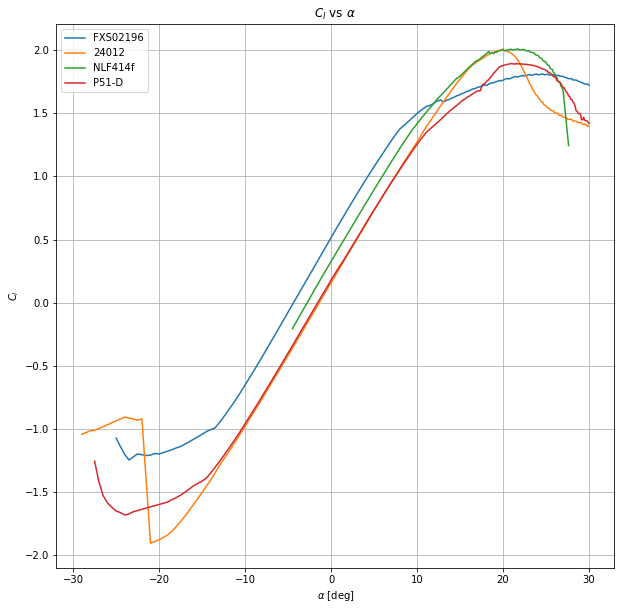

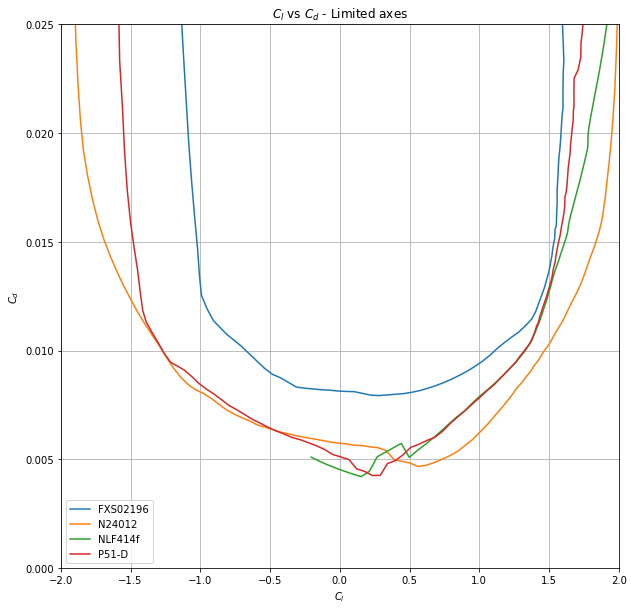

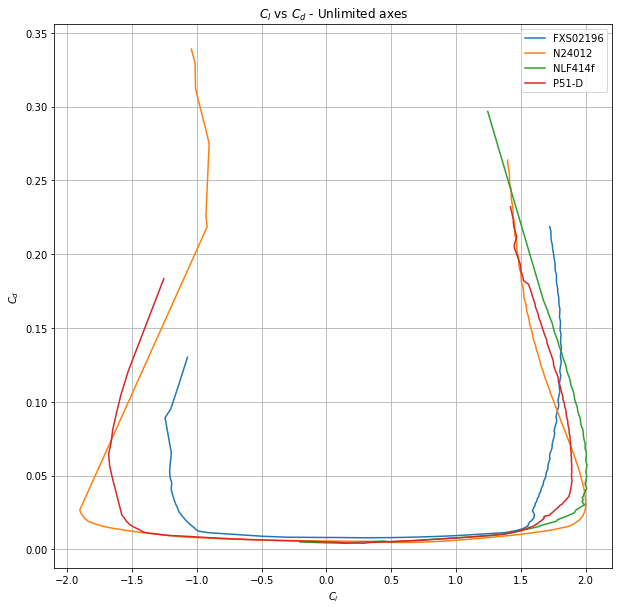

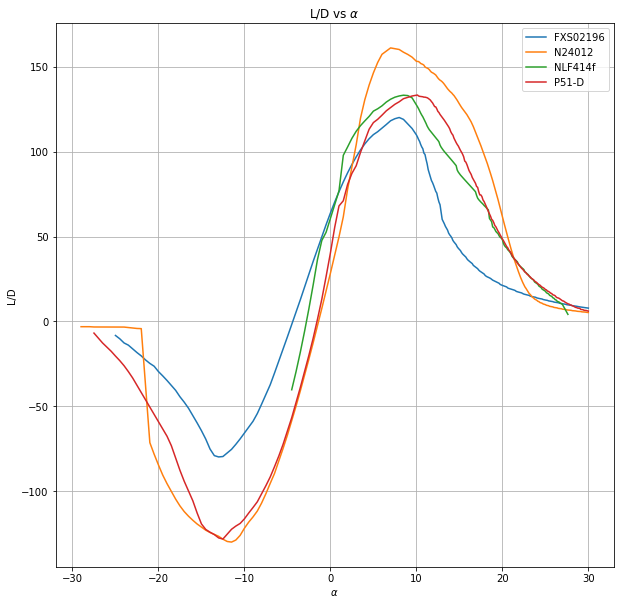

In [176]:
#1.2c Plotting data: viscous lift curves, viscous drag polars, l/d vs a

# Cl v alpha
plt.figure(figsize=(10,10))
plt.plot(fxs_data[0], fxs_data[1], label='FXS02196')
plt.plot(naca_data[0], naca_data[1], label='24012')
plt.plot(nlf_data[0], nlf_data[1], label='NLF414f')
plt.plot(p51_data[0], p51_data[1], label='P51-D')
plt.legend(prop={'size':10})
plt.xlabel(r'$\alpha$ [deg]')
plt.ylabel(r'$C_l$')
plt.title(r'$C_l$ vs $\alpha$')
plt.grid()
plt.show()

# cl vs cd limited for drag buckets
plt.figure(figsize=(10,10))
plt.plot(fxs_data[1], fxs_data[2], label='FXS02196')
plt.plot(naca_data[1], naca_data[2], label='N24012')
plt.plot(nlf_data[1], nlf_data[2], label='NLF414f')
plt.plot(p51_data[1], p51_data[2], label='P51-D')
plt.legend(prop={'size':10})
plt.title(r'$C_l$ vs $C_d$ - Limited axes')
plt.xlabel(r'$C_l$')
plt.ylabel(r'$C_d$')
plt.ylim([0, 0.025])
plt.xlim([-2, 2])
plt.grid()
plt.show()

# cl vs cd unlimited for high alpha
plt.figure(figsize=(10,10))
plt.plot(fxs_data[1], fxs_data[2], label='FXS02196')
plt.plot(naca_data[1], naca_data[2], label='N24012')
plt.plot(nlf_data[1], nlf_data[2], label='NLF414f')
plt.plot(p51_data[1], p51_data[2], label='P51-D')
plt.title(r'$C_l$ vs $C_d$ - Unlimited axes')
plt.xlabel(r'$C_l$')
plt.ylabel(r'$C_d$')
plt.legend(prop={'size':10})
plt.grid()
plt.show()

# l/d vs alpha using cl/cd as l/d equivalent
plt.figure(figsize=(10,10))
plt.plot(fxs_data[0], fxs_data[1]/fxs_data[2], label='FXS02196')
plt.plot(naca_data[0], naca_data[1]/naca_data[2], label='N24012')
plt.plot(nlf_data[0], nlf_data[1]/nlf_data[2], label='NLF414f')
plt.plot(p51_data[0], p51_data[1]/p51_data[2], label='P51-D')
plt.title(r'L/D vs $\alpha$')
plt.xlabel(r'$\alpha$')
plt.ylabel('L/D')
plt.legend(prop={'size':10})
plt.grid()
plt.show()

The lift curves reveal important information on the airfoil performance and stall characteristics. The NLF414f has the highest $C_{L_{max}}$ but also lacks some data in the negative alpha region which may indicate that XFOIL ran into issues. The N24012 also has a very favorable large $C_{L_{max}}$ but the stall is much more aggressive and sudden than the others. The FXS airfoil $C_L$ does not increase as quickly near the stall region as the others do but its stall characteristic is very benign and gradual. It also has the highest $C_L$ near an alpha of zero which is where we expect to be flying with such high speeds.

The drag polar graphs highlight some of the drag characteristics of the airfoils. The P51-D airfoil for example exhibits a drag bucket at low angles of attack. This is very favorable for our competition application. Reducing the drag in our operating alphas will help us go faster with the same amount of thrust. The 24012 airfoil also shows a drag bucket characteristic at slightly higher angles of attack than the P51-D does. The NLF414f airfoil also shows some drag bucket characteristics near an angle of attack of zero. The FXS airfoil is furthest inward on the graph indicating that it produces the most drag compared to the other airfoils. 

The lift to drag ratio graph plot gives us insight on how well the different airfoils would glide if they were installed on a sailplane. While we are not working with a sailplane, this can be helpful to determine relatively how much lift and drag an airfoil may generate at a given alpha. The 24012 airfoil has a much higher lift to drag ratio near 10 degress of attack. The NLF airfoil has the lowest lift to drag ratio trend which may seem like cause for concern but its lift to drag ratio is higher than the others at low angles of attack and lets it lift efficiently during high speed, low angle of attack flight.

The drag polars would likely change to show more drag at high angles of attack because of the 3D effects experienced by the wingtips as the create vortices. The 3D effects would also show less lift in general, especially at higher angles of attack.

In [177]:
# 1.3 Performance Analysis
import pandas as pd

# Using the same given conditions from problem 1.1a
s = 235 # ft2 wing area
c = 9 # ft chord length
b = 42.5 # ft span
Vcruise = 400 # mph
Vcruise = Vcruise*5280/3600 # ft/s
h = 21000 # ft geometric cruise altitude
w = 15000 # lbs loaded weight
mu = 3.25e-7 # slugs/fts dynamic viscosity at h
rho = 1.2249e-3 # slugs/ft3 air density at h

Cl_1g = 2*w/(c*rho*Vcruise**2)/32.2 # 1g cl required will be the same for each airfoil
Cl_2g = 2*Cl_1g # 2g cl required will be the same for each airfoil

def interpolate(x1, y1, x2, y2, x3): # numerical interpolation
    return (y2-y1)*(x3-x1)/(x2-x1)+y1

In [178]:
############# fxs02196 fxs_data
# 1g flight
# using the indexing tricks from Matlab
a = []
Cl = []
d = []
ld = []

x3 = Cl_1g
Cl.append(x3)
x1 = max(fxs_data[1][fxs_data[1]<x3]) # cl
x2 = min(fxs_data[1][fxs_data[1]>x3])

y1 = max(fxs_data[0][fxs_data[1]<x3]) # alpha
y2 = min(fxs_data[0][fxs_data[1]>x3])

a_1g = interpolate(x1, y1, x2, y2, x3)
a.append(a_1g)

y1 = max(fxs_data[2][fxs_data[1]<x3]) # cd
y2 = min(fxs_data[2][fxs_data[1]>x3])

cd_1g = interpolate(x1, y1, x2, y2, x3)
l_d = x3/cd_1g
ld.append(l_d)
D = w/l_d # L/D = Cl/Cd -> D = L/(Cl/Cd)
d.append(D)

# 2g turn
x3 = Cl_2g
Cl.append(x3)

x1 = max(fxs_data[1][fxs_data[1]<x3]) # cl
x2 = min(fxs_data[1][fxs_data[1]>x3])

y1 = max(fxs_data[0][fxs_data[1]<x3]) # alpha
y2 = min(fxs_data[0][fxs_data[1]>x3])

a_2g = interpolate(x1, y1, x2, y2, x3)
a.append(a_2g)

y1 = max(fxs_data[2][fxs_data[1]<x3]) # cd
y2 = min(fxs_data[2][fxs_data[1]>x3])

cd_2g = interpolate(x1, y1, x2, y2, x3)
l_d = x3/cd_2g
ld.append(l_d)
D = w/l_d # L/D = Cl/Cd -> D = L/(Cl/Cd)
d.append(D)

# stall
cl_stall = max(fxs_data[1])
Cl.append(cl_stall)
a_stall = fxs_data[0][fxs_data[1]==max(fxs_data[1])]
a.append(a_stall[0])
cd_stall = fxs_data[2][fxs_data[1]==max(fxs_data[1])]
l_d = x3/cd_stall
ld.append(l_d[0])
D = w/l_d # L/D = Cl/Cd -> D = L/(Cl/Cd)
d.append(D[0])
categories = ['Level Flight', '2G Turn', 'Stall']
tableData = {" ": categories, "Alpha [deg]": a, "Cl": Cl, 'D [lbs]': d, 'L/D': ld}
print('FXS 02-196')
print(pd.DataFrame(tableData))

foil = 'data/fxs02196.dat'
naca = False
p.GetPolar(foil, naca, a, Re, pane=True)

FXS 02-196
                 Alpha [deg]        Cl      D [lbs]       L/D
0  Level Flight    -2.301945  0.245550  4994.606564  3.003240
1       2G Turn    -0.214535  0.491099  1847.092542  8.120871
2         Stall    24.625000  1.812700  4184.488877  3.584667


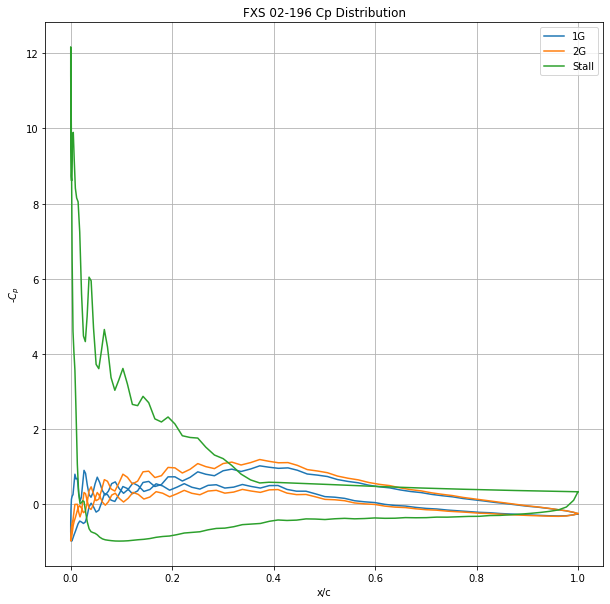

In [180]:
# NOTE: pyxfoil generates .dat files with missing tabs on some rows for the stall file. The tabs must be manually added before the following cell is run!
f = 'data/fxs02196/fxs02196_surfCP_Re1.99e+07a-2.3.dat'
data_1g = np.loadtxt(f, unpack=True, skiprows=3)

f = 'data/fxs02196/fxs02196_surfCP_Re1.99e+07a-0.2.dat'
data_2g = np.loadtxt(f, unpack=True, skiprows=3)

f = 'data/fxs02196/fxs02196_surfCP_Re1.99e+07a24.6.dat'
data_stall = np.loadtxt(f, unpack=True, skiprows=3)

plt.figure(figsize=(10, 10))
plt.title('FXS 02-196 Cp Distribution')
plt.plot(data_1g[0], -data_1g[2], label='1G')
plt.plot(data_2g[0], -data_2g[2], label='2G')
plt.plot(data_stall[0], -data_stall[2], label='Stall')
plt.xlabel('x/c')
plt.ylabel(r'-$C_p$')
plt.legend(prop={'size':10})
plt.grid()
plt.show()

In [159]:
############# Naca 24012 naca_data
# 1g flight
a = []
Cl = []
d = []
ld = []

x3 = Cl_1g
Cl.append(x3)
x1 = max(naca_data[1][naca_data[1]<x3]) # cl
x2 = min(naca_data[1][naca_data[1]>x3])

y1 = max(naca_data[0][naca_data[1]<x3]) # alpha
y2 = min(naca_data[0][naca_data[1]>x3])

a_1g = interpolate(x1, y1, x2, y2, x3)
a.append(a_1g)

y1 = max(naca_data[2][naca_data[1]<x3]) # cd
y2 = min(naca_data[2][naca_data[1]>x3])

cd_1g = interpolate(x1, y1, x2, y2, x3)
l_d = x3/cd_1g
ld.append(l_d)
D = w/l_d # L/D = Cl/Cd -> D = L/(Cl/Cd)
d.append(D)

# 2g turn
x3 = Cl_2g
Cl.append(x3)

x1 = max(naca_data[1][naca_data[1]<x3]) # cl
x2 = min(naca_data[1][naca_data[1]>x3])

y1 = max(naca_data[0][naca_data[1]<x3]) # alpha
y2 = min(naca_data[0][naca_data[1]>x3])

a_2g = interpolate(x1, y1, x2, y2, x3)
a.append(a_2g)

y1 = max(naca_data[2][naca_data[1]<x3]) # cd
y2 = min(naca_data[2][naca_data[1]>x3])

cd_2g = interpolate(x1, y1, x2, y2, x3)
l_d = x3/cd_2g
ld.append(l_d)
D = w/l_d # L/D = Cl/Cd -> D = L/(Cl/Cd)
d.append(D)

# stall
cl_stall = max(naca_data[1])
Cl.append(cl_stall)
a_stall = naca_data[0][naca_data[1]==max(naca_data[1])]
a.append(a_stall[0])
cd_stall = naca_data[2][naca_data[1]==max(naca_data[1])]
l_d = x3/cd_stall
ld.append(l_d[0])
D = w/l_d # L/D = Cl/Cd -> D = L/(Cl/Cd)
d.append(D[0])
categories = ['Level Flight', '2G Turn', 'Stall']
tableData = {" ": categories, "Alpha [deg]": a, "Cl": Cl, 'D [lbs]': d, 'L/D': ld}
print('NACA 24012')
print(pd.DataFrame(tableData))

foil = '24012'
naca = True
p.GetPolar(foil, naca, a, Re)

NACA 24012
                 Alpha [deg]        Cl       D [lbs]        L/D
0  Level Flight     0.739184  0.245550  10936.195820   1.371592
1       2G Turn     2.895974  0.491099   2266.694812   6.617565
2         Stall    20.000000  1.999900    985.645665  15.218451


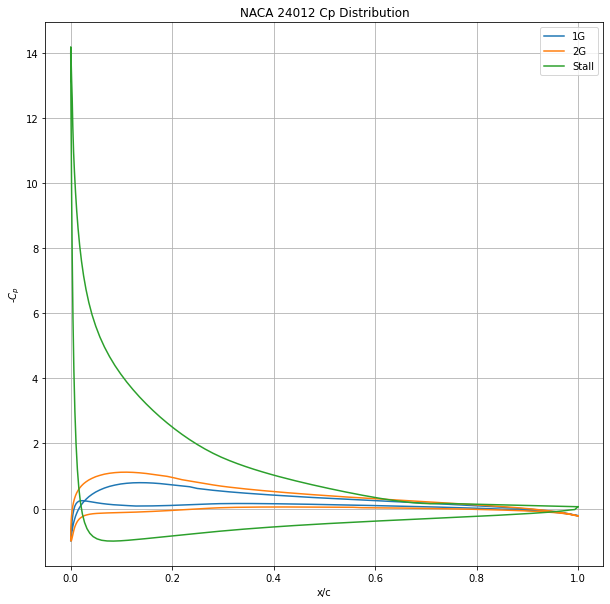

In [161]:
# NOTE: pyxfoil generates .dat files with missing tabs on some rows for the stall file. The tabs must be manually added before the following cell is run!
f = 'data/naca24012/naca24012_surfCP_Re1.99e+07a0.7.dat'
data_1g = np.loadtxt(f, unpack=True, skiprows=3)

f = 'data/naca24012/naca24012_surfCP_Re1.99e+07a2.9.dat'
data_2g = np.loadtxt(f, unpack=True, skiprows=3)

f = 'data/naca24012/naca24012_surfCP_Re1.99e+07a20.0.dat'
data_stall = np.loadtxt(f, unpack=True, skiprows=3)

plt.figure(figsize=(10, 10))
plt.title('NACA 24012 Cp Distribution')
plt.plot(data_1g[0], -data_1g[2], label='1G')
plt.plot(data_2g[0], -data_2g[2], label='2G')
plt.plot(data_stall[0], -data_stall[2], label='Stall')
plt.xlabel('x/c')
plt.ylabel(r'-$C_p$')
plt.legend(prop={'size':10})
plt.grid()
plt.show()

In [162]:
############# NLF414f nlf_data
# 1g flight
a = []
Cl = []
d = []
ld = []

x3 = Cl_1g
Cl.append(x3)
x1 = max(nlf_data[1][nlf_data[1]<x3]) # cl
x2 = min(nlf_data[1][nlf_data[1]>x3])

y1 = max(nlf_data[0][nlf_data[1]<x3]) # alpha
y2 = min(nlf_data[0][nlf_data[1]>x3])

a_1g = interpolate(x1, y1, x2, y2, x3)
a.append(a_1g)

y1 = max(nlf_data[2][nlf_data[1]<x3]) # cd
y2 = min(nlf_data[2][nlf_data[1]>x3])

cd_1g = interpolate(x1, y1, x2, y2, x3)
l_d = x3/cd_1g
ld.append(l_d)
D = w/l_d # L/D = Cl/Cd -> D = L/(Cl/Cd)
d.append(D)

# 2g turn
x3 = Cl_2g
Cl.append(x3)

x1 = max(nlf_data[1][nlf_data[1]<x3]) # cl
x2 = min(nlf_data[1][nlf_data[1]>x3])

y1 = max(nlf_data[0][nlf_data[1]<x3]) # alpha
y2 = min(nlf_data[0][nlf_data[1]>x3])

a_2g = interpolate(x1, y1, x2, y2, x3)
a.append(a_2g)

y1 = max(nlf_data[2][nlf_data[1]<x3]) # cd
y2 = min(nlf_data[2][nlf_data[1]>x3])

cd_2g = interpolate(x1, y1, x2, y2, x3)
l_d = x3/cd_2g
ld.append(l_d)
D = w/l_d # L/D = Cl/Cd -> D = L/(Cl/Cd)
d.append(D)

# stall
cl_stall = max(nlf_data[1])
Cl.append(cl_stall)
a_stall = nlf_data[0][nlf_data[1]==max(nlf_data[1])]
a.append(a_stall[0])
cd_stall = nlf_data[2][nlf_data[1]==max(nlf_data[1])]
l_d = x3/cd_stall
ld.append(l_d[0])
D = w/l_d # L/D = Cl/Cd -> D = L/(Cl/Cd)
d.append(D[0])
categories = ['Level Flight', '2G Turn', 'Stall']
tableData = {" ": categories, "Alpha [deg]": a, "Cl": Cl, 'D [lbs]': d, 'L/D': ld}
print('NLF414f')
print(pd.DataFrame(tableData))

foil = 'data/NLF414f.dat'
naca = False
p.GetPolar(foil, naca, a, Re, pane=True)

NLF414f
                 Alpha [deg]        Cl      D [lbs]        L/D
0  Level Flight    -0.708336  0.245550   311.189547  48.202133
1       2G Turn     1.436295  0.491099   157.958115  94.961883
2         Stall    21.750000  2.010100  1749.238526   8.575160


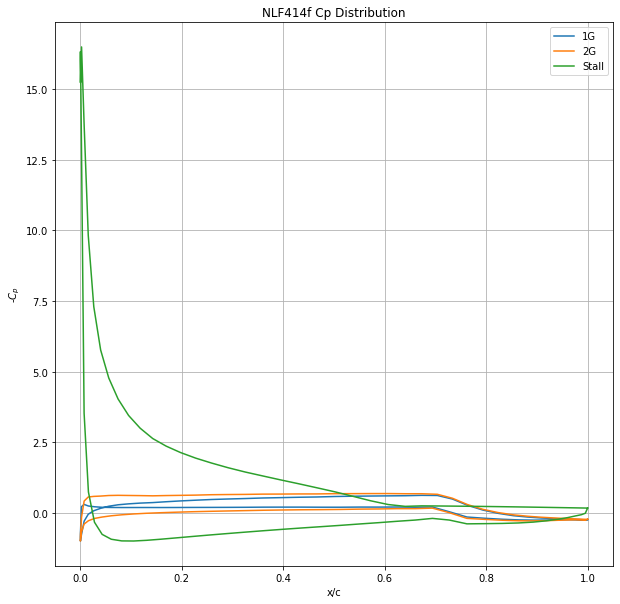

In [163]:
# NOTE: pyxfoil generates .dat files with missing tabs on some rows for the stall file. The tabs must be manually added before the following cell is run!
f = 'data/NLF414f/NLF414f_surfCP_Re1.99e+07a-0.7.dat'
data_1g = np.loadtxt(f, unpack=True, skiprows=3)

f = 'data/NLF414f/NLF414f_surfCP_Re1.99e+07a1.4.dat'
data_2g = np.loadtxt(f, unpack=True, skiprows=3)

f = 'data/NLF414f/NLF414f_surfCP_Re1.99e+07a21.8.dat'
data_stall = np.loadtxt(f, unpack=True, skiprows=3)

plt.figure(figsize=(10, 10))
plt.title('NLF414f Cp Distribution')
plt.plot(data_1g[0], -data_1g[2], label='1G')
plt.plot(data_2g[0], -data_2g[2], label='2G')
plt.plot(data_stall[0], -data_stall[2], label='Stall')
plt.xlabel('x/c')
plt.ylabel(r'-$C_p$')
plt.legend(prop={'size':10})
plt.grid()
plt.show()

In [ ]:
############# P51-D p51_data
# 1g flight
a = []
Cl = []
d = []
ld = []

x3 = Cl_1g
Cl.append(x3)
x1 = max(p51_data[1][p51_data[1]<x3]) # cl
x2 = min(p51_data[1][p51_data[1]>x3])

y1 = max(p51_data[0][p51_data[1]<x3]) # alpha
y2 = min(p51_data[0][p51_data[1]>x3])

a_1g = interpolate(x1, y1, x2, y2, x3)
a.append(a_1g)

y1 = max(p51_data[2][p51_data[1]<x3]) # cd
y2 = min(p51_data[2][p51_data[1]>x3])

cd_1g = interpolate(x1, y1, x2, y2, x3)
l_d = x3/cd_1g
ld.append(l_d)
D = w/l_d # L/D = Cl/Cd -> D = L/(Cl/Cd)
d.append(D)

# 2g turn
x3 = Cl_2g
Cl.append(x3)

x1 = max(p51_data[1][p51_data[1]<x3]) # cl
x2 = min(p51_data[1][p51_data[1]>x3])

y1 = max(p51_data[0][p51_data[1]<x3]) # alpha
y2 = min(p51_data[0][p51_data[1]>x3])

a_2g = interpolate(x1, y1, x2, y2, x3)
a.append(a_2g)

y1 = max(p51_data[2][p51_data[1]<x3]) # cd
y2 = min(p51_data[2][p51_data[1]>x3])

cd_2g = interpolate(x1, y1, x2, y2, x3)
l_d = x3/cd_2g
ld.append(l_d)
D = w/l_d # L/D = Cl/Cd -> D = L/(Cl/Cd)
d.append(D)

# stall
cl_stall = max(p51_data[1])
Cl.append(cl_stall)
a_stall = p51_data[0][p51_data[1]==max(p51_data[1])]
a.append(a_stall[0])
cd_stall = p51_data[2][p51_data[1]==max(p51_data[1])]
l_d = x3/cd_stall
ld.append(l_d[0])
D = w/l_d # L/D = Cl/Cd -> D = L/(Cl/Cd)
d.append(D[0])
categories = ['Level Flight', '2G Turn', 'Stall']
tableData = {" ": categories, "Alpha [deg]": a, "Cl": Cl, 'D [lbs]': d, 'L/D': ld}
print('P51-D')
print(pd.DataFrame(tableData))

foil = 'data/p51d_root.dat'
naca = False
p.GetPolar(foil, naca, a, Re, pane=True)

P51-D
                 Alpha [deg]        Cl      D [lbs]        L/D
0  Level Flight     0.590530  0.245550  9227.053191   1.625654
1       2G Turn     2.833633  0.491099  1978.015853   7.583357
2         Stall    21.000000  1.894600  1432.805644  10.468970


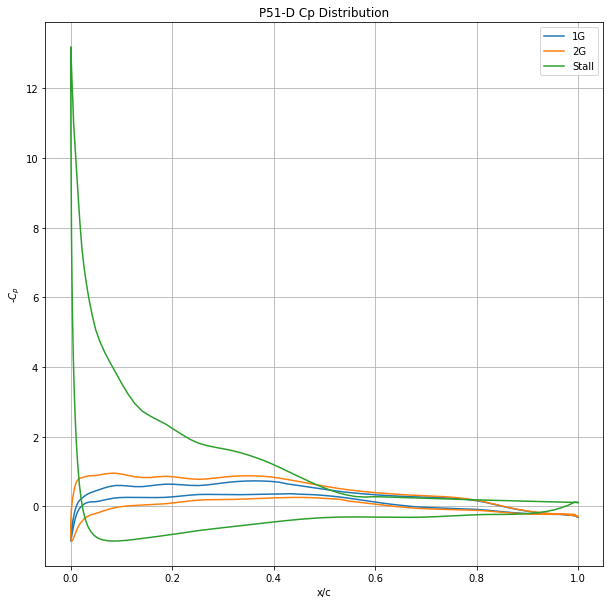

In [113]:
# NOTE: pyxfoil generates .dat files with missing tabs on some rows for the stall file. The tabs must be manually added before the following cell is run!
f = 'data/p51d_root/p51d_root_surfCP_Re1.99e+07a0.6.dat'
data_1g = np.loadtxt(f, unpack=True, skiprows=3)

f = 'data/p51d_root/p51d_root_surfCP_Re1.99e+07a2.8.dat'
data_2g = np.loadtxt(f, unpack=True, skiprows=3)

f = 'data/p51d_root/p51d_root_surfCP_Re1.99e+07a21.0.dat'
data_stall = np.loadtxt(f, unpack=True, skiprows=3)

plt.figure(figsize=(10, 10))
plt.title('P51-D Cp Distribution')
plt.plot(data_1g[0], -data_1g[2], label='1G')
plt.plot(data_2g[0], -data_2g[2], label='2G')
plt.plot(data_stall[0], -data_stall[2], label='Stall')
plt.xlabel('x/c')
plt.ylabel(r'-$C_p$')
plt.legend(prop={'size':10})
plt.grid()
plt.show()

The NACA 24012 airfoil has the highest angle of attack during level cruise flight with an angle of attack of just 0.74 degrees. This is relatively very low. This airfoil has the lowest $C_L$ at low angles of attack amongst the other airfoils so it requires a slightly larger alpha to increase the $C_L$ until it is able to lift the airplane.

Based on all of the available information, the NLF414f airfoil would be the best choice for our racing aircraft because it exhibits the least drag for both the level 1G condition and the 2G turning condition. Its drag is smaller by a factor of approximately 10 or more compared to the other airfoils. With less drag, our engine can propel us forward more easily. Our aircraft would travel much faster with the given engine thrust.

NACA 23014 Airfoil
Design Lift Coefficient = 0.3
Maximum Camber Location = 0.15 of Chord


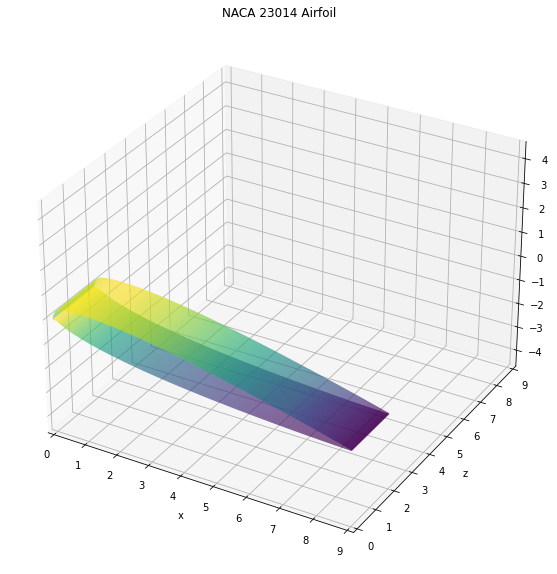

NACA 24012 Airfoil
Design Lift Coefficient = 0.3
Maximum Camber Location = 0.20 of Chord


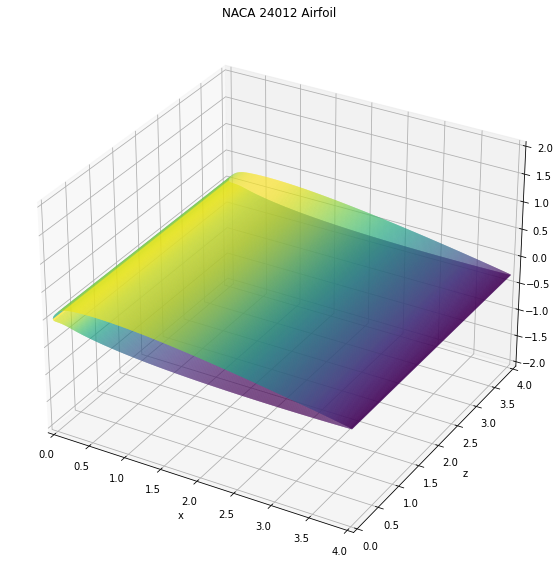

In [132]:
# Problem 2: Finite Wing Model
# following code adapted from the given Problem 2 approach document
def naca_5dig_des(L, P, TT, C, b, Dim3 = False):
    """Here, we can choose a 5 digit designation for an airfoil and 
    plot the expected geometry. This function works similarly to the 4 digit designations.

    L = first digit of NACA 5 digit designation: a single number that represents DESIGN LIFT COEFFICIENT, 0.15 * L
    P = second digit of NACA 5 digit designation: a single digit for the x coordinate of the LOCATION OF MAX CAMBER, 0.05 * P
    S = third digit of NACA 5 digit designation: a single digit indicating whether the camber is simple (S = 0) or reflex (S = 0)
    TT = last two digits of NACA 5 digit designation: MAXIMUM THICKNESS in percent of chord
    C = desired chord length
    b = span
    For example: the NACA 23112 describes an airfoil with a design lift coefficient of 0.3 (0.15 * L) = (0.15 * 2),
    the point of maximum camber is located at 15% chord (0.05 * P) = (0.05 * 3)
    reflex camber, S - 1 and a max thickness of 12%

    """

    'Variable Definition'
    c = C
    l = L
    p = P
    tt = TT/100
    xloc = np.linspace(0,c,100*c)

    if Dim3: # for plotting 3D
        yloc = np.linspace(0,b,100*b)
        X,Y = np.meshgrid(xloc,yloc)
        Z_Surf = np.ones_like(Y)

    'Built In Values'
    r = np.array([0.0580,0.1260,0.2025,0.2900,0.3910])
    k1 = np.array([361.400,51.640,15.957,6.643,3.230])

    'Creation of Chord Line'
    # Create an empty array to hold the chord values
    chord = (np.zeros(len(xloc)))
    
    'Creation of Camber Line'
    # Create an empty array to hold the camber values
    Cam=(np.zeros(len(xloc)))

    'Determining r and k'
    if p == 1:
        rval = r[0]
        kval = k1[0]
    elif p == 2:
        rval = r[1]
        kval = k1[1]
    elif p == 3:
        rval = r[2]
        kval = k1[2]
    elif p == 4:
        rval = r[3]
        kval = k1[3]
    elif p == 5:
        rval = r[4]
        kval = k1[4]
    else:
        print("You did not have a  valid input for P")

    for i in range(0,len(xloc)):
	    if xloc[i] <= (rval):
		    Cam[i] = (kval/6) * ((xloc[i]**3) - (3*rval*(xloc[i]**2)) + ((rval**2)*(3 - rval)*xloc[i]))

	    if xloc[i] >= (rval):
		    Cam[i] = ((kval*(rval**3))/6)*(1-xloc[i])

    Cam = l/2 * Cam


    'Upper Thickness'
    UZt=((tt/0.2)*(((0.2969)*((xloc/c)**(0.5)))-((0.1260)*(xloc/c))-((0.3516)*((xloc/c)**(2)))+((0.2843)*((xloc/c)**3))-((0.1015)*((xloc/c)**4))))

    'Lower Thickness'
    LZt=(-1)*((tt/0.2)*(((0.2969)*((xloc/c)**(0.5)))-((0.1260)*(xloc/c))-((0.3516)*((xloc/c)**(2)))+((0.2843)*((xloc/c)**3))-((0.1015)*((xloc/c)**4))))

    print('NACA {}{}0{} Airfoil'.format(l, p, int(tt*100)))
    print('Design Lift Coefficient = {}'.format(l*0.15))
    print(f'Maximum Camber Location = {(p*0.05):.2f} of Chord')

    if Dim3:
        Z_Surf_Up = ((Z_Surf * Cam) + ((UZt)))*c
        Z_Surf_Low = ((Z_Surf * Cam) + ((LZt)))*c
        width = 10
        plt.figure(figsize=(width, width))
        ax = plt.axes(projection='3d')
        x = np.linspace(0,c,100*c)
        y = np.linspace(0,b,100*b)
        X,Y = np.meshgrid(x,y)
        ax.plot_surface(X, Y, Z_Surf_Up, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
        ax.plot_surface(X, Y, Z_Surf_Low, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
        ax.set_xlim(0, c); ax.set_ylim(0, c); ax.set_zlim(-c/2, c/2)
        plt.title('NACA {}{}0{} Airfoil'.format(l, p, int(tt*100)))
        plt.xlabel('x')
        plt.ylabel('z')
        plt.show()
    else: 
        plt.figure(figsize=(10,10))
        plt.title('NACA {}{}0{} Airfoil'.format(l, p, int(tt*100)))
        plt.xlabel('x')
        plt.ylabel('z')
        plt.axis('equal')
        plt.plot(xloc,Cam+UZt, label='Upper Surface',color='cyan',linestyle='-',linewidth=1)
        plt.plot(xloc,Cam+LZt, label='Lower Surface',color='purple',linestyle='-',linewidth=1)
        plt.plot(xloc,Cam, label='Camber Line',color='blue',linestyle='--',linewidth=1)
        #plt.plot(xloc, chord, label ='Chord Line', color = 'black', linestyle ='-', linewidth = 1)
        plt.legend(loc='best',prop={'size':10})
        plt.show()

naca_5dig_des(2, 3, 14, 9, 2, True) # naca 23014 with 9ft chord and 2ft span
naca_5dig_des(2, 4, 12, 4, 4, True) # naca 24012 with 4ft chord and 8ft span

Our 3D wing plotter is very simple. One could add many other functions to allow for more complicated geometry. Wings typically have many other possible geometric characteristics such as washout, taper, varying chord size, and different planform shapes. Each of these can be applied in different ways.

Washout is simply a varying angle of attack of the airfoil along the wing. Typically the angle of attack is largest at the root of the wing so that it stalls first and creates a more efficient lift distribution. This can be plotted by applying a rotation matrix to each slice of the 3-dimensional wing coordinates. It is simply built up of many small slices of the same airfoil so an increasing angle of attack can be applied by iterating through each slice and using the rotation matrix as we have done in a previous project. The slices should be rotated about the x axis.

Swept wings can be plotted by applying the rotation matrix on each half of the wing such that each half is rotated about the y axis. The geometry where the wings join in the middle would however not be accurate with this method.

Different planform shapes can be applied as well to our plotting function by adjusting the mesh grid such that the x and z coordinates are a function of span. That function would have to be specified to achieve the desired planform shape.

Varying chord length can be added also by replacing the chord length variable included in calculating x with a given function of the varying chord length. The x, z, and y coordinates would have to be calculated in a sequence rather than all at once as they currently are.

## Problem 3: 3D Aircraft Performance

When analyzing a wing's performance, it is important to take 3D effects into account. This means that the drag needs to be described with a drag polar which accounts for the induced drag caused by wingtip vortices. Other performance parameters can also be calculated such as the drag at zero lift, span efficiency factor, lift over drag ratio, and approximated thrust required.

In [168]:
# Problem 3
w = 4000 # lbs
s = 200 # ft^2
b = 42.5 # ft span
AR = b**2/s # aspect ratio
foil = '2412'
# drag polar: Cd = 0.025 + 0.054*CL^2

With zero lift, the coefficient of drag is made up entirely of the viscous and profile drag. So, for no lift, $C_D = 0.025$ with $C_L=0$

The induced drag includes the span efficiency factor. Here the induced drag is defined as $C_{D,i} = 0.054C_L^2$. The full equation for the induced drag is:

$C_{D,i} = \dfrac{C_L^2}{\pi e AR}$

The two forms can be equated to solve for e, the span efficiency factor.

$\dfrac{C_L^2}{\pi e AR} = 0.054C_L^2$ which reduces to:

$e = \dfrac{1}{0.054 \pi AR}$


In [172]:
e = 1 / (0.054 * np.pi * AR)
print(f'Span efficiency factor: {e:.4f}')

v = 175 * 5280/3600 # mph to ft/s
# lift equation cl = w / (1/2 * rho * S * v**2)
cl = w / (0.5 * rho * s * v**2)
print(f'Coefficient of lift for cruise: {cl:.3f}')

cd = 0.025 + 0.054*cl**2
l_d = cl/cd
print(f'L/D at 175mph cruise: {l_d:.3f}')

D = cd * .5 * rho * s * v**2
T = D # in equilibrium flight, the thrust equals the drag
print(f'Total drag and thrust at given conditions: {T:.3f} lbs')

Span efficiency factor: 0.6527
Coefficient of lift for cruise: 0.496
L/D at 175mph cruise: 12.953
Total drag and thrust at given conditions: 308.806 lbs


# Conclusion

In this project we have successfully analyzed 3D wings with some simplifications. For example, we used airfoil data to calculate wing performance which would not realistically be accurate. In real life, we will have to learn to deal more with these 3D finite wings because infinite 2D airfoil wings do not exist. Even though the airfoil data is only an approximation for the wing performance, it is important to analyze simple 2D airflow over our airfoils to help us choose airfoils that are most likely to satisfy a given objective when they are actually in flight. The 3D effects would be studied in great detail after an airfoil has been chosen. This project has made the iterative process of choosing an airfoil for a wing much more clear. Having a starting point is also lots of help when working on a complex project like constructing an aircraft.